In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# !mkdir ../data/processed

In [4]:
PATH_TO_ORIGINAL_DATA = '../data/'
PATH_TO_PROCESSED_DATA = '../data/processed/'

### Reading clicks dataset

In [5]:
%%time
df_clicks = pd.read_csv(PATH_TO_ORIGINAL_DATA + 'yoochoose-clicks.dat', sep=',', header=None,
                  dtype={0:np.int32, 1:str, 2:np.int64, 3:str})

CPU times: user 25.2 s, sys: 2.36 s, total: 27.5 s
Wall time: 27.5 s


In [6]:
# !cat ../data/dataset-README.txt

In [7]:
# data.iloc[:,3].unique()

In [8]:
df_clicks.iloc[:,3].value_counts()

0             16337653
S             10769610
1              1671754
2              1292249
3               789713
                ...   
2089134695           1
2089287155           1
2088962151           1
2089759631           1
2089251022           1
Name: 3, Length: 339, dtype: int64

In [9]:
len(df_clicks.iloc[:,3].unique())

339

### Function to convert the category type to a manageable level

In [10]:
def assign_cat(x):
    if x == "S":
        return "PROMOTION"
    elif np.int(x) == 0:
        return "NONE"
    elif np.int(x) < 13:
        return "CATEGORY"
    else:
        return "BRAND"

In [11]:
%%time
df_clicks["Item_Type"] = df_clicks.iloc[:,3].map(assign_cat)

CPU times: user 14.8 s, sys: 44 ms, total: 14.8 s
Wall time: 14.8 s


In [12]:
df_clicks.Item_Type.unique()

array(['NONE', 'PROMOTION', 'CATEGORY', 'BRAND'], dtype=object)

In [13]:
df_clicks.Item_Type.value_counts()

NONE         16337653
PROMOTION    10769610
CATEGORY      5820377
BRAND           76304
Name: Item_Type, dtype: int64

In [14]:
df_clicks.columns =  ["SessionId", "TimeStr", "ItemId", "Item_Type_Code", "ItemType"]

In [15]:
%%time
df_clicks.drop(["Item_Type_Code"], inplace=True, axis=1)

CPU times: user 2.62 s, sys: 492 ms, total: 3.11 s
Wall time: 3.1 s


In [16]:
df_clicks.head()

,SessionId,TimeStr,ItemId,ItemType
0,1,2014-04-07T10:51:09.277Z,214536502,NONE
1,1,2014-04-07T10:54:09.868Z,214536500,NONE
2,1,2014-04-07T10:54:46.998Z,214536506,NONE
3,1,2014-04-07T10:57:00.306Z,214577561,NONE
4,2,2014-04-07T13:56:37.614Z,214662742,NONE


### Finding number of unique sessions, number of unique items

In [18]:
print("Number of unique sessions:", len(df_clicks.SessionId.unique()))

Number of unique sessions: 9249729


In [19]:
df_clicks_by_session = df_clicks.groupby(["SessionId"])

In [20]:
%%time
df_clicks_sessionCount = df_clicks_by_session["ItemId"].count()

CPU times: user 2.08 s, sys: 220 ms, total: 2.3 s
Wall time: 2.29 s


CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 189 ms


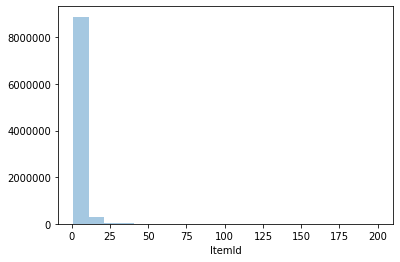

In [21]:
%%time
sns.distplot(df_clicks_sessionCount, kde=False, bins=20)

CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 235 ms


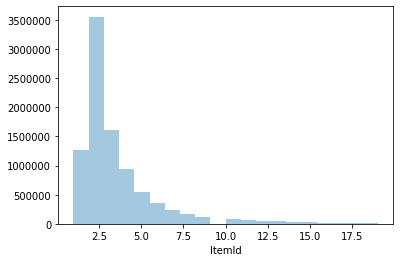

In [22]:
%%time
sns.distplot(df_clicks_sessionCount[df_clicks_sessionCount<20], kde=False, bins=20)

### Reading buy dataset

In [23]:
%%time
df_buys = pd.read_csv(PATH_TO_ORIGINAL_DATA + 'yoochoose-buys.dat', sep=',', header=None,
                  dtype={0:np.int32, 1:str, 2:np.int64, 3:np.int64, 4:np.int64})

CPU times: user 1.03 s, sys: 48 ms, total: 1.08 s
Wall time: 1.07 s


In [24]:
df_buys.columns = ["SessionId", "TimeStr", "ItemId", "Price", "Quantity"]

In [25]:
df_buys.drop(["TimeStr"], inplace=True, axis=1)

In [26]:
df_buys["Action"] = "BUY"

In [27]:
df_buys.head()

,SessionId,ItemId,Price,Quantity,Action
0,420374,214537888,12462,1,BUY
1,420374,214537850,10471,1,BUY
2,281626,214535653,1883,1,BUY
3,420368,214530572,6073,1,BUY
4,420368,214835025,2617,1,BUY


In [28]:
%%time
df = pd.merge(left=df_clicks, right=df_buys, how="left", on=["SessionId", "ItemId"])

CPU times: user 13.6 s, sys: 2.16 s, total: 15.8 s
Wall time: 15.8 s


In [29]:
df.shape, df_clicks.shape, df_buys.shape

((33234442, 7), (33003944, 4), (1150753, 5))

In [30]:
ItemId = 214821371
SessionId = 11

In [31]:
query = "ItemId==@ItemId & SessionId==@SessionId"

In [32]:
df.query(query)

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
26,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
27,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
28,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
29,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
30,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY
31,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY


In [33]:
df_buys.query(query)

,SessionId,ItemId,Price,Quantity,Action
10,11,214821371,1046,1,BUY
11,11,214821371,1046,1,BUY


In [34]:
df_clicks.query(query)

,SessionId,TimeStr,ItemId,ItemType
26,11,2014-04-03T10:45:29.873Z,214821371,NONE
27,11,2014-04-03T10:46:12.162Z,214821371,NONE
28,11,2014-04-03T10:46:57.355Z,214821371,NONE


### Drop the duplicate rows

In [35]:
df.drop_duplicates(inplace=True)

### Refined data

Remove sessions of length less than a specific threshold and remove items that don't occur more than a specific threshold

In [88]:
SESSION_THRESHOLD = 20
ITEM_THRESHOLD = 1000

In [89]:
session_lengths = df.groupby(["SessionId"]).size()

In [90]:
session_lengths_w_threshold = (session_lengths[session_lengths>SESSION_THRESHOLD])

In [91]:
len(session_lengths_w_threshold)

69701

In [92]:
session_lengths_w_threshold = session_lengths_w_threshold.reset_index()

In [93]:
%%time
df_with_session_threshold = df[df.SessionId.isin(session_lengths_w_threshold.SessionId)]

CPU times: user 2.47 s, sys: 400 ms, total: 2.87 s
Wall time: 2.87 s


In [94]:
df_with_session_threshold.head()

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
281,87,2014-04-07T06:19:08.914Z,214652220,NONE,1465.0,1.0,BUY
282,87,2014-04-07T06:19:20.979Z,214840483,NONE,1674.0,1.0,BUY
283,87,2014-04-07T06:19:28.762Z,214840483,NONE,1674.0,1.0,BUY
284,87,2014-04-07T06:26:01.516Z,214717286,NONE,NaN,NaN,NaN
285,87,2014-04-07T06:26:15.176Z,214558807,NONE,NaN,NaN,NaN


In [95]:
df_with_session_threshold.shape

(2152501, 7)

In [96]:
item_lengths = df.groupby(["ItemId"]).size()
item_lengths_w_threshold = item_lengths[item_lengths>ITEM_THRESHOLD]
len(item_lengths_w_threshold)

5131

In [97]:
item_lengths_w_threshold = item_lengths_w_threshold.reset_index()

In [98]:
df_with_session_item_threshold = df_with_session_threshold[df_with_session_threshold.ItemId.isin(item_lengths_w_threshold.ItemId)]

In [99]:
df_with_session_item_threshold.shape

(1622164, 7)

In [100]:
session_lengths_2 = df_with_session_item_threshold.groupby(["SessionId"]).size()
session_lengths_2_w_threshold = (session_lengths_2[session_lengths_2 > SESSION_THRESHOLD])
len(session_lengths_2_w_threshold)

42144

In [101]:
session_lengths_2_w_threshold = session_lengths_2_w_threshold.reset_index()

In [102]:
%%time
df_final = df_with_session_item_threshold[df_with_session_item_threshold.SessionId.isin(session_lengths_2_w_threshold.SessionId)]

CPU times: user 164 ms, sys: 4 ms, total: 168 ms
Wall time: 165 ms


In [103]:
df_final.shape

(1252811, 7)

In [104]:
df_final.Action.fillna(value="CLICK", inplace=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [105]:
df_final.Quantity.fillna(value=0.0, inplace=True)

In [106]:
df_final.Price.fillna(value=0.0, inplace=True)

In [107]:
df_final.head()

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
282,87,2014-04-07T06:19:20.979Z,214840483,NONE,1674.0,1.0,BUY
283,87,2014-04-07T06:19:28.762Z,214840483,NONE,1674.0,1.0,BUY
284,87,2014-04-07T06:26:01.516Z,214717286,NONE,0.0,0.0,CLICK
285,87,2014-04-07T06:26:15.176Z,214558807,NONE,0.0,0.0,CLICK
286,87,2014-04-07T06:26:32.159Z,214821300,NONE,0.0,0.0,CLICK


### Fixing time

In [108]:
%%time
df_final['Time'] = df_final.TimeStr.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()) #This is not UTC. It does not really matter.

CPU times: user 21.4 s, sys: 20 ms, total: 21.4 s
Wall time: 21.4 s


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df_final.head()

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action,Time
282,87,2014-04-07T06:19:20.979Z,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
283,87,2014-04-07T06:19:28.762Z,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
284,87,2014-04-07T06:26:01.516Z,214717286,NONE,0.0,0.0,CLICK,1.396852e+09
285,87,2014-04-07T06:26:15.176Z,214558807,NONE,0.0,0.0,CLICK,1.396852e+09
286,87,2014-04-07T06:26:32.159Z,214821300,NONE,0.0,0.0,CLICK,1.396852e+09


In [110]:
del(df_final["TimeStr"])

In [111]:
df_final.head(15)

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
282,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
283,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
284,87,214717286,NONE,0.0,0.0,CLICK,1.396852e+09
285,87,214558807,NONE,0.0,0.0,CLICK,1.396852e+09
286,87,214821300,NONE,0.0,0.0,CLICK,1.396852e+09
287,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09
288,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09
289,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09
291,87,214819430,NONE,470.0,1.0,BUY,1.396852e+09
292,87,214819430,NONE,470.0,1.0,BUY,1.396852e+09


In [112]:
df_final.ItemType.unique()

array(['NONE', 'PROMOTION', 'CATEGORY', 'BRAND'], dtype=object)

### Train and Validation Dataset

In [113]:
session_lengths_final = df_final.groupby(["SessionId"]).size()

In [114]:
session_lengths_final = session_lengths_final.reset_index()

In [115]:
session_lengths_final.columns = ["SessionId", "NumRows"]

In [116]:
session_lengths_final["length_70p"] =(session_lengths_final.NumRows*0.7).astype(np.int)

In [117]:
session_lengths_final.head()

,SessionId,NumRows,length_70p
0,87,24,16
1,496,64,44
2,626,22,15
3,651,25,17
4,827,39,27


In [118]:
%%time
df_final["RunningCount"] = df_final.groupby(["SessionId"]).cumcount()+1

CPU times: user 108 ms, sys: 16 ms, total: 124 ms
Wall time: 123 ms


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_final.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time,RunningCount
282,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09,1
283,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09,2
284,87,214717286,NONE,0.0,0.0,CLICK,1.396852e+09,3
285,87,214558807,NONE,0.0,0.0,CLICK,1.396852e+09,4
286,87,214821300,NONE,0.0,0.0,CLICK,1.396852e+09,5


In [120]:
df_final_updated = pd.merge(left=df_final, right=session_lengths_final, on="SessionId", how="left")

In [121]:
df_final.shape, df_final_updated.shape

((1252811, 8), (1252811, 10))

In [122]:
df_final_updated.head(20)

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time,RunningCount,NumRows,length_70p
0,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09,1,24,16
1,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09,2,24,16
2,87,214717286,NONE,0.0,0.0,CLICK,1.396852e+09,3,24,16
3,87,214558807,NONE,0.0,0.0,CLICK,1.396852e+09,4,24,16
4,87,214821300,NONE,0.0,0.0,CLICK,1.396852e+09,5,24,16
5,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09,6,24,16
6,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09,7,24,16
7,87,214826908,NONE,837.0,1.0,BUY,1.396852e+09,8,24,16
8,87,214819430,NONE,470.0,1.0,BUY,1.396852e+09,9,24,16
9,87,214819430,NONE,470.0,1.0,BUY,1.396852e+09,10,24,16


In [123]:
df_train = df_final_updated[df_final_updated.RunningCount <= df_final_updated.length_70p].copy()
df_test = df_final_updated[df_final_updated.RunningCount > df_final_updated.length_70p].copy()

In [124]:
df_train.shape, df_test.shape

((856892, 10), (395919, 10))

In [125]:
df_train.drop(["RunningCount", "NumRows", "length_70p"], inplace=True, axis=1)
df_test.drop(["RunningCount", "NumRows", "length_70p"], inplace=True, axis=1)

In [126]:
df_train.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
0,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
1,87,214840483,NONE,1674.0,1.0,BUY,1.396852e+09
2,87,214717286,NONE,0.0,0.0,CLICK,1.396852e+09
3,87,214558807,NONE,0.0,0.0,CLICK,1.396852e+09
4,87,214821300,NONE,0.0,0.0,CLICK,1.396852e+09


In [127]:
df_test.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
16,87,214553844,NONE,0.0,0.0,CLICK,1.396852e+09
17,87,214601229,NONE,0.0,0.0,CLICK,1.396852e+09
18,87,214555500,NONE,0.0,0.0,CLICK,1.396853e+09
19,87,214819760,NONE,0.0,0.0,CLICK,1.396853e+09
20,87,214717850,NONE,0.0,0.0,CLICK,1.396853e+09


In [128]:
%%time
df_train.to_csv(PATH_TO_PROCESSED_DATA+"train.csv", index=False)
df_test.to_csv(PATH_TO_PROCESSED_DATA+"test.csv", index=False)

CPU times: user 10.4 s, sys: 68 ms, total: 10.5 s
Wall time: 10.5 s


In [129]:
!ls -al ../data/processed/ --block-size=M

total 274M
drwxrwxr-x 2 ubuntu ubuntu   1M Sep  3 14:25 .
drwxrwxr-x 3 ubuntu ubuntu   1M Sep  3 12:23 ..
-rw-rw-r-- 1 ubuntu ubuntu 209M Sep  3 14:26 full_rating.csv
-rw-rw-r-- 1 ubuntu ubuntu  21M Sep  3 15:54 test.csv
-rw-rw-r-- 1 ubuntu ubuntu  45M Sep  3 15:54 train.csv


### Creating combined dataset

In [130]:
%%time

df_train = pd.read_csv(PATH_TO_PROCESSED_DATA + "train.csv")
df_test = pd.read_csv(PATH_TO_PROCESSED_DATA + "test.csv")

CPU times: user 752 ms, sys: 36 ms, total: 788 ms
Wall time: 785 ms


In [131]:
df = pd.concat([df_train, df_test], axis=0)

In [132]:
df_train.shape, df_test.shape, df.shape

((856892, 7), (395919, 7), (1252811, 7))

In [133]:
%%time
df.sort_values(by=["SessionId", "Time"], inplace=True)

CPU times: user 668 ms, sys: 16 ms, total: 684 ms
Wall time: 682 ms


In [134]:
%%time
df["ActionScore"] = df.Action.apply(lambda x: 1 if (x == "CLICK") else 5)

CPU times: user 612 ms, sys: 0 ns, total: 612 ms
Wall time: 612 ms


In [135]:
%%time
df.iloc[:,[0,1,7,6]].to_csv(PATH_TO_PROCESSED_DATA+"full_rating.csv", index=False)

CPU times: user 9.35 s, sys: 48 ms, total: 9.4 s
Wall time: 9.43 s


In [136]:
df.iloc[:,[0,1,7,6]].head()

,SessionId,ItemId,ActionScore,Time
0,87,214840483,5,1.396852e+09
1,87,214840483,5,1.396852e+09
2,87,214717286,1,1.396852e+09
3,87,214558807,1,1.396852e+09
4,87,214821300,1,1.396852e+09
